# Monte Carlo Simulation

This file implements a simulation for various specified DGP's. 

A number of dependencies are necessary - particularly the accompanying function files. 

In [1]:
# IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import os 
import pickle
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import importlib

#Import own files 
import sys 
sys.path.append(r'F:\Documents\TheEnd\Code\Functions')
sys.path.append(r'C:\Users\rbjoe\Dropbox\Kugejl\10.semester\TheEnd\Code\Functions')
import monte_carlo_simulation as mc
import dgp_stuff as dgp
import neural_net as nn
import estimators as est
import summaries as smr
import figurez as figz
import tablez as tblz


###############################################################################
### Load parameters (data is in single files)
# Load parameters
parameters, estimators, g_functions = \
        mc.MC_load_pars('6_1_v2_reg_prod_2018_07_22') 


#importlib.reload(smr)
#smr.parameter_print(parameters)
#smr.parameter_print(estimators)
#smr.parameter_print(g_functions)
parameters


{'seed': 4598,
 'M': 100,
 'k': 1,
 'n': 100000,
 'C': 4,
 'Z': 0,
 'V': 0,
 'run_wellspecified': True,
 'parallel': True,
 'decimals': 2,
 'reduce_size': True,
 'save_file': False,
 'filename': '6_1_v2_reg_prod_2018_07_22',
 'start_time': datetime.datetime(2018, 7, 22, 17, 2, 43, 198461),
 'beta_distribution': <function dgp_stuff.draw_beta_normal(k=2, mu=1, stdev=1)>,
 'beta_mean': 1,
 'beta_scale': 1,
 'redraw': False,
 'x_distribution': <function dgp_stuff.draw_x_normal(mu, cov, n=10000, **kwargs)>,
 'x_distribution_parameters': <function dgp_stuff.gen_x_normal_unitvariance_randommean(k=2, mean=1)>,
 'x_mean': 0,
 'u_distribution': <function dgp_stuff.draw_u_normal(n, stdev=1)>,
 'u_scale': 2,
 'y_generate': <function dgp_stuff.gen_y_reg(g, u)>,
 'y_squashing': <function dgp_stuff.linear_output(s)>,
 'y_squashing_prime': <function dgp_stuff.linear_output_prime(s)>,
 'B': 0,
 'run_observables': True}

In [2]:
figtitle = '6_1_v2_reg_'
table_subset = ['MLE', 'OLS (I)', 'OLS (II)', 'NN (I)', 'NN (II)']

table_notes = 'Cells show averages across simulations, with standard errors in parentheses.' \
                            + ' Each row represents ' + '{:,}'.format(parameters['M']) + ' simulations' \
                            + ' with ' + '{:,}'.format(parameters['k']) + ' regressors' \
                            + ' and ' '{:,}'.format(parameters['C']) + ' confounders.' \
                            + ' Actual models include all variables. Observed models exclude the confounders. ' \
                            + ' Estimators are trained on ' + '{:,}'.format(parameters['n']) + ' observations.' \
                            + ' Reported values are from a test set of equal size.' 

comp_kws = {'coefficient':0}

### Distribution of average marginal effects 

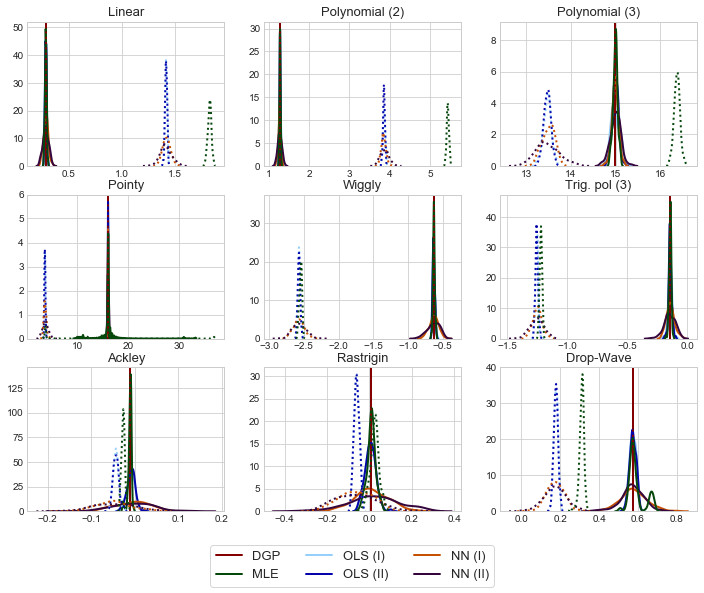

In [3]:
# Average marginal effects 
res_mrgeffs_avg = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
res_mrgeffs_avg_obs = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
figz.fig_wrapper_g_double(g_series1 = res_mrgeffs_avg, 
                          g_series2 = res_mrgeffs_avg_obs, 
                   g_figfunc = figz.fig_distribution, 
                  g_functions=g_functions, estimators=estimators, 
                  save_file=True, filename=figtitle+'mrgeff_avg_distributions', 
                  legend = 'figure',
                  share_y=False, share_x=False)


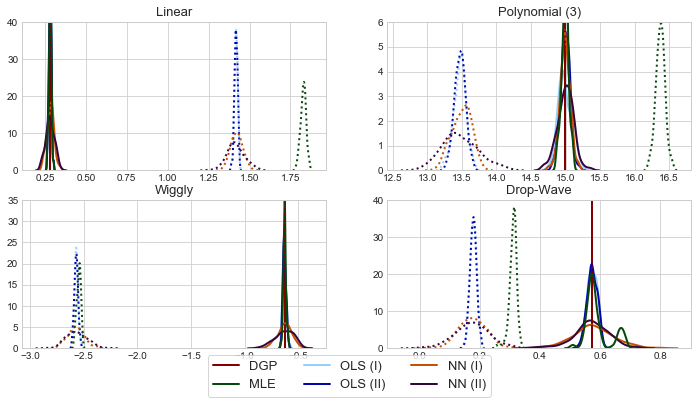

In [4]:
# Average marginal effects 
res_mrgeffs_avg = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
res_mrgeffs_avg_obs = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
figz.fig_wrapper_g_double(g_series1 = res_mrgeffs_avg, 
                          g_series2 = res_mrgeffs_avg_obs, 
                   g_figfunc = figz.fig_distribution, 
                  g_functions=g_functions, estimators=estimators, 
                  save_file=True, filename=figtitle+'mrgeff_avg_distributions_subset', 
                  legend = 'figure',
                  n_rows =2, n_cols=2, 
                  subset=['Linear', 'Polynomial_3', 'Wiggly', 'Drop-Wave'],
                  ymax = [40, 6, 35, 40], 
                  share_y=False, share_x=False)


### Mean RMSE for marginal effects

In [5]:
# MRMSE for marginal effects
res_mrgeffs_mrmse = smr.comp_wrapper_gseries(smr.comp_mrmse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
res_mrgeffs_mrmse_obs = smr.comp_wrapper_gseries(smr.comp_mrmse,'res_mrgeffs_obs', dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])


tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_mrmse,
                            g_series2 = res_mrgeffs_mrmse_obs,
                            cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_MRMSE', 
                    caption='Mean RMSE for marginal effects.', 
                    label=figtitle+'table_mrgeff_MRMSE', 
                    note1=table_notes)

C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


MLE                       OLS (I)                 \
                        Act.           Obs.           Act.           Obs.   
Linear          0.01 (0.002)   1.55 (0.016)   0.01 (0.002)   1.14 (0.010)   
Polynomial (2)  0.01 (0.004)   6.88 (0.030)   1.72 (0.003)   3.15 (0.023)   
Polynomial (3)  0.02 (0.003)   4.02 (0.117)   7.97 (0.020)  15.37 (0.066)   
Pointy             inf (nan)  18.40 (7.721)  12.16 (0.016)  17.91 (0.069)   
Wiggly          0.02 (0.005)   2.26 (0.021)   3.44 (0.004)   4.63 (0.016)   
Trig. pol (3)   0.01 (0.004)   1.92 (0.008)   0.82 (0.001)   1.27 (0.010)   
Ackley          1.66 (0.014)   1.85 (0.134)   1.71 (0.002)   1.81 (0.003)   
Rastrigin       0.03 (0.011)   0.10 (0.045)   6.36 (0.004)   6.71 (0.009)   
Drop-Wave       0.74 (1.836)   3.84 (1.440)   2.72 (0.003)   3.74 (0.007)   

                     OLS (II)                       NN (I)                 \
                         Act.           Obs.          Act.           Obs.   
Linear           0.02 (0.004)   1.14 (0.010)  0.09 (0.009)   1.15 (0.036)   
Polynomial (2)   0.03 (0.005)   4.32 (0.028)  0.51 (0.030)   4.36 (0.054)   
Polynomial (3)   5.17 (0.018)   7.31 (0.067)  2.84 (0.156)   3.98 (0.159)   
Pointy          10.44 (0.013)  17.96 (0.071)  2.93 (0.414)  13.08 (0.276)   
Wiggly           3.16 (0.005)   4.64 (0.018)  1.32 (0.056)   2.46 (0.114)   
Trig. pol (3)    0.54 (0.002)   1.66 (0.016)  0.24 (0.013)   1.80 (0.034)   
Ackley           1.68 (0.002)   1.80 (0.003)  1.34 (0.170)   1.21 (0.078)   
Rastrigin        6.36 (0.004)   6.71 (0.009)  3.04 (0.166)   3.10 (0.272)   
Drop-Wave        2.66 (0.003)   3.71 (0.007)  1.99 (0.034)   3.34 (0.015)   

                     NN (II)                 
                        Act.           Obs.  
Linear          0.11 (0.010)   1.15 (0.053)  
Polynomial (2)  0.47 (0.031)   4.38 (0.104)  
Polynomial (3)  2.44 (0.186)   4.03 (0.214)  
Pointy          2.46 (0.150)  12.76 (0.569)  
Wiggly          1.08 (0.040)   2.28 (0.098)  
Trig. pol (3)   0.24 (0.010)   1.81 (0.058)  
Ackley          1.12 (0.030)   0.97 (0.042)  
Rastrigin       2.85 (0.168)   2.16 (0.178)  
Drop-Wave       0.82 (0.038)   3.28 (0.019)

### RMSE for marginal effect of one regressor

In [6]:
# MRMSE for marginal effects
res_mrgeffs_rmse = smr.comp_wrapper_gseries(smr.comp_rmse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions,
                                            comp_kws=comp_kws,
                                           filename = parameters['filename'])
res_mrgeffs_rmse_obs = smr.comp_wrapper_gseries(smr.comp_rmse,'res_mrgeffs_obs', dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                                comp_kws=comp_kws,
                                           filename = parameters['filename'])


tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_rmse,
                            g_series2 = res_mrgeffs_rmse_obs,
                            cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_MRMSE_coeff', 
                    caption='RMSE for marginal effect of single regressor.', 
                    label=figtitle+'table_mrgeff_MRMSE_coeff', 
                    note1=table_notes)

C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


MLE                       OLS (I)                 \
                        Act.           Obs.           Act.           Obs.   
Linear          0.01 (0.005)   1.55 (0.016)   0.01 (0.004)   1.14 (0.010)   
Polynomial (2)  0.02 (0.009)   6.88 (0.030)   1.81 (0.004)   3.15 (0.023)   
Polynomial (3)  0.02 (0.008)   4.02 (0.117)  15.29 (0.061)  15.37 (0.066)   
Pointy             inf (nan)  18.40 (7.721)  12.99 (0.032)  17.91 (0.069)   
Wiggly          0.03 (0.012)   2.26 (0.021)   4.20 (0.011)   4.63 (0.016)   
Trig. pol (3)   0.02 (0.009)   1.92 (0.008)   0.61 (0.001)   1.27 (0.010)   
Ackley          1.76 (0.045)   1.85 (0.134)   1.81 (0.003)   1.81 (0.003)   
Rastrigin       0.04 (0.026)   0.10 (0.045)   6.71 (0.009)   6.71 (0.009)   
Drop-Wave       0.82 (1.477)   3.84 (1.440)   3.72 (0.007)   3.74 (0.007)   

                     OLS (II)                       NN (I)                 \
                         Act.           Obs.          Act.           Obs.   
Linear           0.02 (0.006)   1.14 (0.010)  0.08 (0.015)   1.15 (0.036)   
Polynomial (2)   0.04 (0.012)   4.32 (0.028)  0.55 (0.041)   4.36 (0.054)   
Polynomial (3)   6.58 (0.040)   7.31 (0.067)  3.79 (0.461)   3.98 (0.159)   
Pointy          12.98 (0.033)  17.96 (0.071)  3.61 (0.759)  13.08 (0.276)   
Wiggly           4.19 (0.011)   4.64 (0.018)  1.87 (0.113)   2.46 (0.114)   
Trig. pol (3)    0.26 (0.003)   1.66 (0.016)  0.19 (0.012)   1.80 (0.034)   
Ackley           1.79 (0.003)   1.80 (0.003)  1.53 (0.169)   1.21 (0.078)   
Rastrigin        6.71 (0.009)   6.71 (0.009)  3.19 (0.259)   3.10 (0.272)   
Drop-Wave        3.63 (0.006)   3.71 (0.007)  2.45 (0.078)   3.34 (0.015)   

                     NN (II)                 
                        Act.           Obs.  
Linear          0.10 (0.017)   1.15 (0.053)  
Polynomial (2)  0.50 (0.043)   4.38 (0.104)  
Polynomial (3)  3.17 (0.364)   4.03 (0.214)  
Pointy          2.98 (0.385)  12.76 (0.569)  
Wiggly          1.40 (0.099)   2.28 (0.098)  
Trig. pol (3)   0.21 (0.014)   1.81 (0.058)  
Ackley          1.25 (0.080)   0.97 (0.042)  
Rastrigin       2.77 (0.215)   2.16 (0.178)  
Drop-Wave       1.03 (0.062)   3.28 (0.019)

### Mean MSE for marginal effects

In [7]:
# MMSE for marginal effects
res_mrgeffs_mmse = smr.comp_wrapper_gseries(smr.comp_mmse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
res_mrgeffs_mmse_obs = smr.comp_wrapper_gseries(smr.comp_mmse,'res_mrgeffs_obs', dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])

tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_mmse, 
                     g_series2 = res_mrgeffs_mmse_obs, 
                     cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_MMSE', 
                    caption='Mean MSE for marginal effects.', 
                    label=figtitle+'table_mrgeff_MMSE', 
                    note1=table_notes,
                            )

C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


MLE                           OLS (I)  \
                         Act.              Obs.            Act.   
Linear           0.00 (0.000)      2.39 (0.050)    0.00 (0.000)   
Polynomial (2)   0.00 (0.000)     47.32 (0.414)    4.63 (0.020)   
Polynomial (3)   0.00 (0.000)     16.15 (0.941)   78.89 (0.456)   
Pointy              inf (nan)  398.09 (520.217)  181.69 (0.491)   
Wiggly           0.00 (0.000)      5.10 (0.095)   12.76 (0.031)   
Trig. pol (3)    0.00 (0.000)      3.69 (0.032)    0.79 (0.002)   
Ackley           4.21 (0.106)      3.45 (0.427)    4.38 (0.011)   
Rastrigin        0.00 (0.001)      0.01 (0.010)   63.42 (0.100)   
Drop-Wave       5.61 (40.475)    16.81 (31.434)    7.66 (0.018)   

                                      OLS (II)                         NN (I)  \
                          Obs.            Act.            Obs.           Act.   
Linear            1.29 (0.022)    0.00 (0.000)    1.29 (0.022)   0.01 (0.002)   
Polynomial (2)    9.92 (0.145)    0.00 (0.000)   18.70 (0.239)   0.32 (0.043)   
Polynomial (3)  236.10 (2.044)   34.32 (0.247)   53.50 (0.978)   8.79 (1.112)   
Pointy          320.74 (2.484)  143.80 (0.336)  322.56 (2.566)   9.70 (3.183)   
Wiggly           21.46 (0.145)   11.62 (0.036)   21.57 (0.164)   1.97 (0.163)   
Trig. pol (3)     1.61 (0.026)    0.38 (0.002)    2.75 (0.053)   0.06 (0.007)   
Ackley            3.29 (0.010)    4.30 (0.011)    3.25 (0.012)   2.38 (0.957)   
Rastrigin        45.03 (0.116)   63.42 (0.100)   45.03 (0.116)  11.33 (1.498)   
Drop-Wave        14.02 (0.050)    7.33 (0.018)   13.76 (0.050)   4.03 (0.143)   

                                     NN (II)                   
                          Obs.          Act.             Obs.  
Linear            1.32 (0.083)  0.01 (0.002)     1.32 (0.122)  
Polynomial (2)   19.02 (0.471)  0.26 (0.038)    19.23 (0.915)  
Polynomial (3)   15.86 (1.281)  6.45 (1.006)    16.32 (1.739)  
Pointy          171.14 (7.231)  6.78 (0.902)  163.04 (14.512)  
Wiggly            6.05 (0.555)  1.27 (0.097)     5.20 (0.449)  
Trig. pol (3)     3.25 (0.124)  0.06 (0.005)     3.28 (0.209)  
Ackley            1.47 (0.200)  1.37 (0.080)     0.95 (0.082)  
Rastrigin         9.68 (1.729)  8.61 (0.965)     4.69 (0.787)  
Drop-Wave        11.13 (0.103)  0.68 (0.066)    10.77 (0.124)

### MSE for marginal effect of one regressor

In [8]:
# MMSE for marginal effects
res_mrgeffs_mse = smr.comp_wrapper_gseries(smr.comp_mse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws,
                                           filename = parameters['filename'])
res_mrgeffs_mse_obs = smr.comp_wrapper_gseries(smr.comp_mse,'res_mrgeffs_obs', dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions,
                                               comp_kws = comp_kws,
                                           filename = parameters['filename'])

tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_mse, 
                     g_series2 = res_mrgeffs_mse_obs, 
                     cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_MMSE_coef', 
                    caption='Mean MSE for marginal effects.', 
                    label=figtitle+'table_mrgeff_MMSE_coef', 
                    note1=table_notes,
                            )

C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


MLE                           OLS (I)  \
                        Act.              Obs.            Act.   
Linear          0.00 (0.000)      2.39 (0.050)    0.00 (0.000)   
Polynomial (2)  0.00 (0.000)     47.32 (0.414)    3.29 (0.016)   
Polynomial (3)  0.00 (0.000)     16.15 (0.941)  233.77 (1.877)   
Pointy             inf (nan)  398.09 (520.217)  168.80 (0.820)   
Wiggly          0.00 (0.001)      5.10 (0.095)   17.68 (0.091)   
Trig. pol (3)   0.00 (0.000)      3.69 (0.032)    0.38 (0.001)   
Ackley          3.11 (0.154)      3.45 (0.427)    3.28 (0.010)   
Rastrigin       0.00 (0.003)      0.01 (0.010)   45.03 (0.116)   
Drop-Wave       2.85 (5.427)    16.81 (31.434)   13.86 (0.049)   

                                      OLS (II)                         NN (I)  \
                          Obs.            Act.            Obs.           Act.   
Linear            1.29 (0.022)    0.00 (0.000)    1.29 (0.022)   0.01 (0.002)   
Polynomial (2)    9.92 (0.145)    0.00 (0.001)   18.70 (0.239)   0.30 (0.045)   
Polynomial (3)  236.10 (2.044)   43.24 (0.529)   53.50 (0.978)  14.60 (3.636)   
Pointy          320.74 (2.484)  168.55 (0.869)  322.56 (2.566)  13.59 (6.152)   
Wiggly           21.46 (0.145)   17.57 (0.095)   21.57 (0.164)   3.49 (0.421)   
Trig. pol (3)     1.61 (0.026)    0.07 (0.001)    2.75 (0.053)   0.04 (0.005)   
Ackley            3.29 (0.010)    3.21 (0.010)    3.25 (0.012)   2.37 (0.526)   
Rastrigin        45.03 (0.116)   45.03 (0.116)   45.03 (0.116)  10.27 (1.670)   
Drop-Wave        14.02 (0.050)   13.16 (0.047)   13.76 (0.050)   6.02 (0.379)   

                                      NN (II)                   
                          Obs.           Act.             Obs.  
Linear            1.32 (0.083)   0.01 (0.004)     1.32 (0.122)  
Polynomial (2)   19.02 (0.471)   0.25 (0.044)    19.23 (0.915)  
Polynomial (3)   15.86 (1.281)  10.19 (2.368)    16.32 (1.739)  
Pointy          171.14 (7.231)   9.00 (2.395)  163.04 (14.512)  
Wiggly            6.05 (0.555)   1.97 (0.282)     5.20 (0.449)  
Trig. pol (3)     3.25 (0.124)   0.04 (0.006)     3.28 (0.209)  
Ackley            1.47 (0.200)   1.58 (0.211)     0.95 (0.082)  
Rastrigin         9.68 (1.729)   7.71 (1.208)     4.69 (0.787)  
Drop-Wave        11.13 (0.103)   1.07 (0.132)    10.77 (0.124)

### Distribution of marginal effects 

In [9]:
#importlib.reload(smr)
# Concatenate marginal effects
res_mrgeffs_pooled = smr.comp_wrapper_gseries(smr.comp_pool_simulations, 'res_mrgeffs', 
                                           g_functions=g_functions,
                                           comp_kws = comp_kws, #Look at one beta.
                                           filename = parameters['filename'])



C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


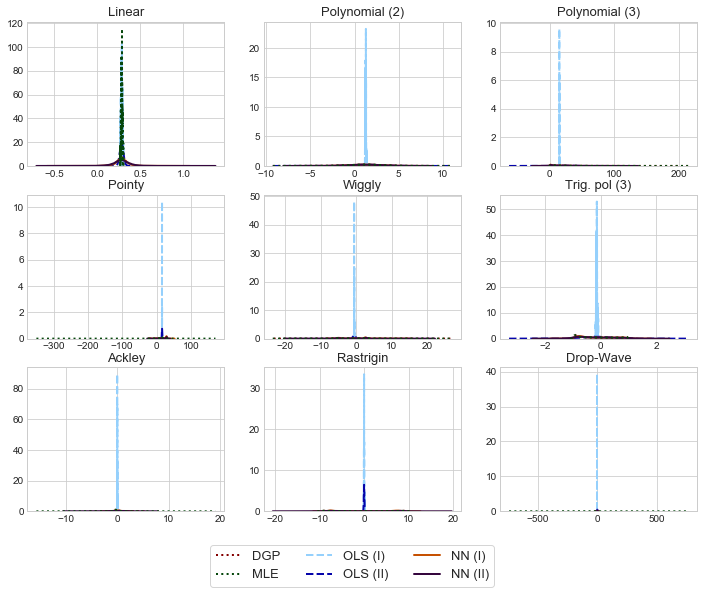

In [10]:
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   #models = ['DGP', 'Logit (I)', 'NN (I)'],
                   #n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  #ymax = 30, ymin=0,
                  #subset=['Logit', 'Rastrigin'], 
                  )

C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


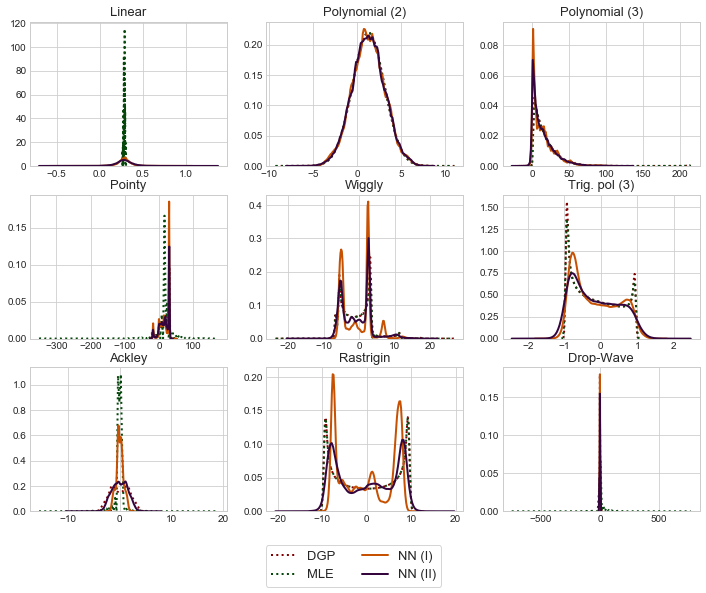

In [11]:
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   models = ['DGP', 'MLE', 'NN (I)','NN (II)'],
                   #n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  #ymax = 30, ymin=0,
                  #subset=['Logit', 'Rastrigin'], 
                  )

C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


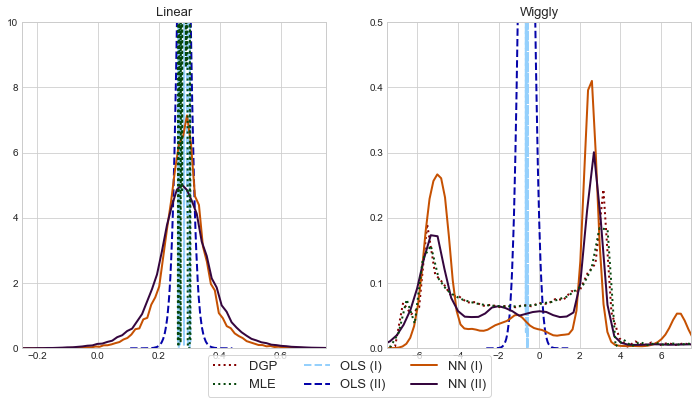

In [12]:
importlib.reload(figz)
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   #models = ['DGP', 'MLE', 'NN (I)','NN (II)'],
                   n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs_subset',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  ymax = [10,0.5], ymin=0,
                   xmax = [0.75, 7.5], xmin = [-0.25, -7.5],
                  subset=['Linear', 'Wiggly'], 
                  )